In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

plt.style.use("seaborn")

In [2]:
import matplotlib
matplotlib.__version__

'3.4.3'

In [4]:
df = pd.read_csv("Student/student-mat_targetBinSuccess.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,success
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


# Aufgabe 1

In [5]:
df["G1-G3"] = df["G3"] - df["G1"]
df["G1-G3"].std()

diff = df.groupby("G1-G3").count()
diff.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,success
G1-G3,,,,,,,,,,,,,,,,,,,,,
-12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-10,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
-9,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
-8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [16]:
df["G1-G3"].head().median()

1.0

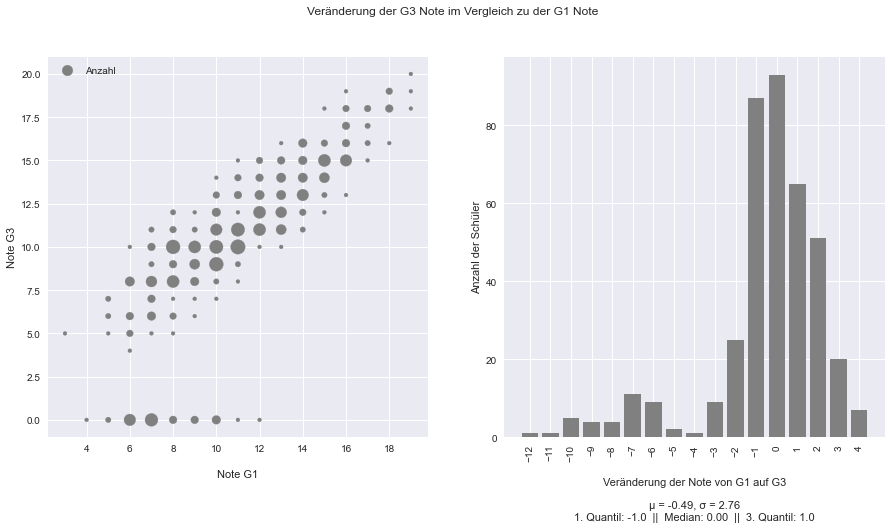

In [21]:
plt.figure(figsize=(15, 7))
plt.suptitle("Veränderung der G3 Note im Vergleich zu der G1 Note")


# Plotting the left plot
data = list(zip(df["G1"], df["G3"]))
size = np.array(list(Counter(data).values())) * 15
data_x = [x for x, _ in Counter(data).keys()]
data_y = [y for _, y in Counter(data).keys()]


# Plotting the left plot
plt.subplot(121)
plt.scatter(x=np.array(data_x), y=data_y, color="gray", s=size, label="Anzahl")
plt.xlabel("\nNote G1")
plt.ylabel("Note G3")
plt.legend()


# Plotting the right plot
plt.subplot(122)
plt.xlabel("\nVeränderung der Note von G1 auf G3"
           f"\n\nµ = {df['G1-G3'].mean():.2f}, σ = {df['G1-G3'].std():.2f}"
           f"\n1. Quantil: {np.quantile(df['G1-G3'], .25)}  ||  Median: {df['G1-G3'].median():.2f}  ||  3. Quantil: {np.quantile(df['G1-G3'], .75)}")
plt.ylabel("Anzahl der Schüler")

plt.bar(x=list(diff.index), height=diff["school"], color="gray")

plt.xticks(diff.index, rotation=90);
plt.savefig("Student/d1.pdf")

# Aufgabe 2

In [24]:
len(df[df["Fedu"] == 0])
df[df["Fedu"] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,success,G1-G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,1,1,1,8,11,11,10,1,-1
171,GP,M,16,U,GT3,T,1,0,other,other,...,2,1,1,3,2,13,15,16,2,3


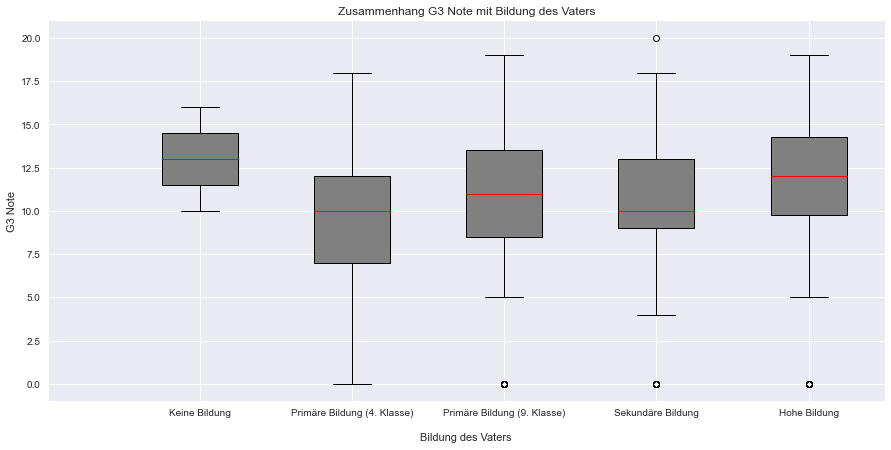

In [6]:
plt.figure(figsize=(15, 7))
plt.title("Zusammenhang G3 Note mit Bildung des Vaters")
plt.xlabel("\nBildung des Vaters")
plt.ylabel("G3 Note")

x = ["", "Keine Bildung", "Primäre Bildung (4. Klasse)", "Primäre Bildung (9. Klasse)", "Sekundäre Bildung", "Hohe Bildung"]
data = [df[df["Fedu"] == i]["G3"] for i in range(5)]

c = "gray"
boxes =plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c), medianprops=dict(color="red"))

plt.xticks(range(len(x)), x);
plt.savefig("Student/d2.pdf")

# Aufgabe 3

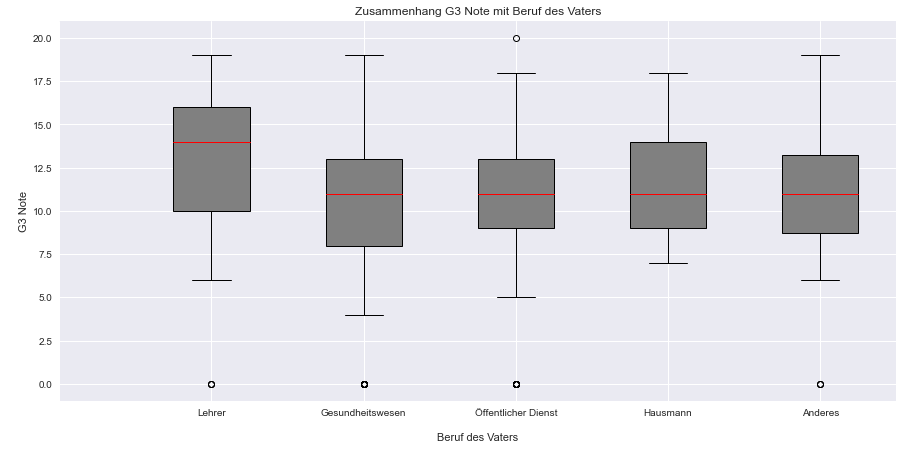

In [7]:
plt.figure(figsize=(15, 7))
plt.title("Zusammenhang G3 Note mit Beruf des Vaters")
plt.xlabel("\nBeruf des Vaters")
plt.ylabel("\nG3 Note")

x = ["", "Lehrer", "Gesundheitswesen", "Öffentlicher Dienst", "Hausmann", "Anderes"]
data = [df[df["Fjob"] == i]["G3"] for i in df["Fjob"].unique()]

c = "gray"
boxes =plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c), medianprops=dict(color="red"))

plt.xticks(range(len(x)), x);
plt.savefig("Student/d3.pdf")

# Aufgabe 4

In [8]:
df[(df["absences"] >= 10) & (df["absences"] < 20)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,success,G1-G3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,1,3
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,2,0
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,2,4,5,16,6,5,5,1,-1
25,GP,F,16,U,GT3,T,2,2,services,services,...,2,1,3,5,14,6,9,8,1,2
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,5,5,5,5,16,10,12,11,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,MS,F,18,R,GT3,T,4,4,other,teacher,...,2,4,2,5,10,14,12,11,2,-3
373,MS,F,17,R,GT3,T,1,2,other,other,...,5,1,3,1,14,6,5,5,1,-1
379,MS,F,17,R,GT3,T,3,1,at_home,other,...,4,2,3,1,17,10,10,10,1,0
384,MS,M,18,R,GT3,T,4,2,other,other,...,3,4,3,3,14,6,5,5,1,-1


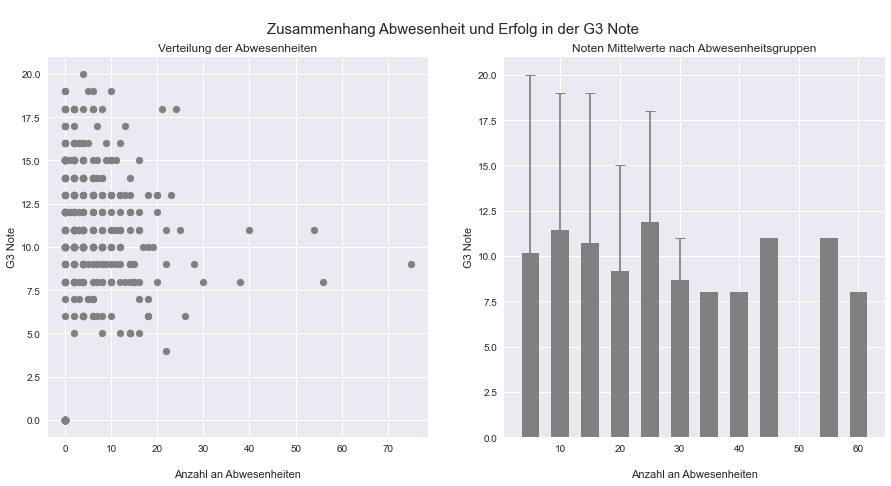

In [45]:
plt.figure(figsize=(15, 7))
plt.suptitle("\nZusammenhang Abwesenheit und Erfolg in der G3 Note", size=15)


# Generating the left plot
plt.subplot(121)
plt.title("Verteilung der Abwesenheiten")
plt.xlabel("\nAnzahl an Abwesenheiten")
plt.ylabel("G3 Note")

plt.scatter(x=df["absences"], y=df["G3"], color="gray")


# Generating the right plot
plt.subplot(122)
plt.title("Noten Mittelwerte nach Abwesenheitsgruppen")
plt.xlabel("\nAnzahl an Abwesenheiten")
plt.ylabel("G3 Note")

x = list(range(0, df["absences"].max() + 5, 5))
height = [df[( df["absences"] >= x[i-1] )  & ( df["absences"] < x[i] ) ]["G3"].mean() for i in range(len(x))]
errorbar = [df[( df["absences"] >= x[i-1] )  & ( df["absences"] < x[i] ) ]["G3"].max() - df[( df["absences"] >= x[i-1] )  & ( df["absences"] < x[i] ) ]["G3"].mean() for i in range(len(x))]

plt.bar(x, height, width=3, color="gray")
plt.errorbar(x, y=height, yerr=errorbar, ls="none", color="gray", capsize=5, capthick=1);
# plt.savefig("Student/d4.pdf")

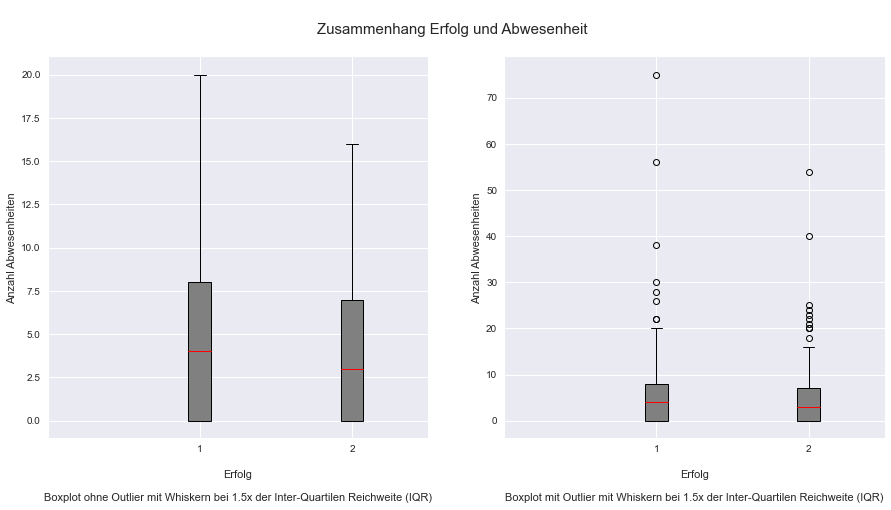

In [60]:
plt.figure(figsize=(15, 7))
plt.suptitle("\nZusammenhang Erfolg und Abwesenheit", size=15)


# Left plot
plt.subplot(121)
plt.title("")

plt.xlabel("\nErfolg\n\nBoxplot ohne Outlier mit Whiskern bei 1.5x der Inter-Quartilen Reichweite (IQR)")
plt.ylabel("Anzahl Abwesenheiten")

x = ["", "1", "2"]
data = [df[df["success"] == i]["absences"] for i in df["success"].unique()]

c = "gray"
boxes =plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c), medianprops=dict(color="red"), showfliers=False)

plt.xticks(range(len(x)), x)


# Right plot
plt.subplot(122)
plt.title("")

plt.xlabel("\nErfolg\n\nBoxplot mit Outlier mit Whiskern bei 1.5x der Inter-Quartilen Reichweite (IQR)")
plt.ylabel("Anzahl Abwesenheiten")

x = ["", "1", "2"]
data = [df[df["success"] == i]["absences"] for i in df["success"].unique()]

c = "gray"
boxes =plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c), medianprops=dict(color="red"), showfliers=True)

plt.xticks(range(len(x)), x);